[출처](https://www.datamanim.com/dataset/ADPpb/00/29.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#### 1-1

- 계약자고유번호를 기준으로 거주연도 별 여러개의 데이터가 쌓여 있다. 각 계약자고유번호에 대해 가장 최신의 거주연도 행만 남겨라.
- 데이터 설명 : 대구도시공사_빅데이터_영구임대아파트 입주자 퇴거여부 데이터, 고유번호를 가진 계약자와 특정 아파트에 대해 매년 퇴거여부를 기록한 데이터

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv',encoding= 'cp949')
df.head(3)

,순번,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
0,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2008,47100,3646000,46,33,남,미혼,3,미퇴거
1,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2009,56500,4375000,46,34,남,미혼,3,미퇴거
2,1,유효,10,222,강남아파트,5,7.0,14520,1,12,...,NaN,2010,56500,4375000,46,35,남,미혼,3,미퇴거


In [3]:
# 가장 최신의 '거주연도' 행만 남기기
result_df = df.sort_values(by=['계약자고유번호', '거주연도'], ascending=[True, False]).\
drop_duplicates(subset='계약자고유번호', keep='first')

#### 1-2 EDA 및 결측치 처리 (시각화 포함)

In [41]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10348 entries, 85372 to 10361
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   순번       10348 non-null  int64  
 1   계약구분     10287 non-null  object 
 2   재계약횟수    10348 non-null  int64  
 3   거주개월     10348 non-null  int64  
 4   아파트 이름   10348 non-null  object 
 5   아파트 ID   10348 non-null  int64  
 6   아파트 평점   10208 non-null  float64
 7   호실고유번호   10348 non-null  int64  
 8   층        10348 non-null  int64  
 9   평형대      10348 non-null  int64  
 10  계약자고유번호  10348 non-null  int64  
 11  계약서고유번호  10348 non-null  int64  
 12  입주연도     10348 non-null  int64  
 13  퇴거연도     4092 non-null   float64
 14  거주연도     10348 non-null  int64  
 15  월세(원)    10348 non-null  int64  
 16  보증금(원)   10348 non-null  int64  
 17  대표나이     10348 non-null  int64  
 18  나이       10348 non-null  int64  
 19  성별       10348 non-null  object 
 20  결혼여부     10348 non-null  object 
 21  거주자 수   

In [42]:
result_df.isna().sum()

순번            0
계약구분         61
재계약횟수         0
거주개월          0
아파트 이름        0
아파트 ID        0
아파트 평점      140
호실고유번호        0
층             0
평형대           0
계약자고유번호       0
계약서고유번호       0
입주연도          0
퇴거연도       6256
거주연도          0
월세(원)         0
보증금(원)        0
대표나이          0
나이            0
성별            0
결혼여부          0
거주자 수         0
퇴거여부          0
dtype: int64

In [4]:
# 결측치 처리
# print(result_df['계약구분'].value_counts().index[0]) # 유효
# print(result_df['아파트 평점'].value_counts().index[0]) # 5.0
# print(result_df['퇴거연도'].value_counts().index[0]) # 2017.0

result_df.loc[result_df['계약구분'].isna(), '계약구분'] = result_df['계약구분'].value_counts().index[0]
result_df.loc[result_df['아파트 평점'].isna(), '아파트 평점'] = result_df['아파트 평점'].value_counts().index[0]
result_df.loc[result_df['퇴거연도'].isna(), '퇴거연도'] = result_df['퇴거연도'].value_counts().index[0]

result_df.isna().sum().sum() # 결측치 대체 완료

0

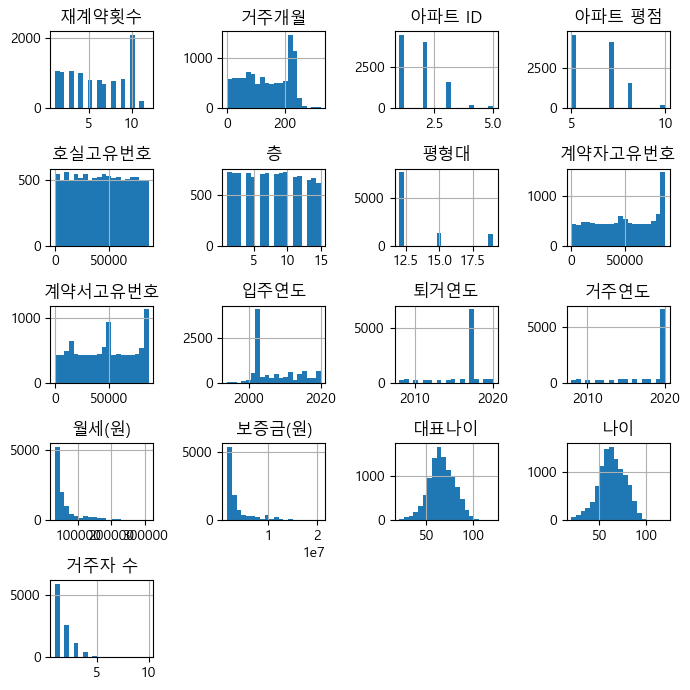

In [55]:
result_df.drop('순번', axis=1).hist(bins=20, figsize=(7,7))
plt.tight_layout()
plt.show()

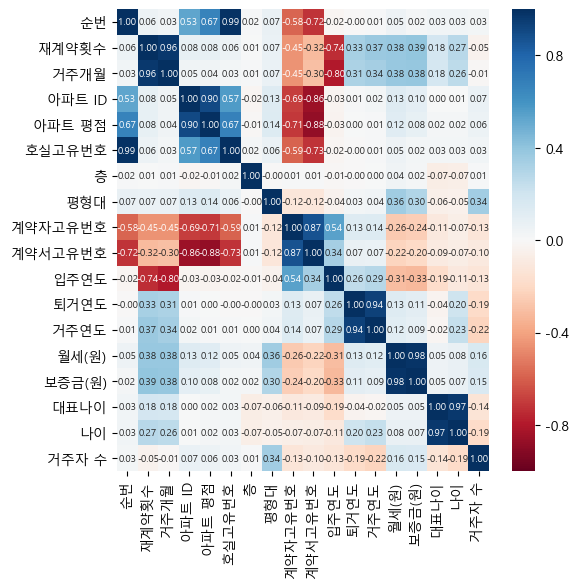

In [59]:
result_df_corr = result_df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(result_df_corr, vmin=-1, vmax=1, cmap='RdBu', annot=True, fmt='.2f', annot_kws={'fontsize': 7});

1. 결측치 존재 여부
    - 계약구분, 아파트 평점, 퇴거연도 변수에 결측치가 존재하였고, 각각 최빈값으로 대체하였다.
1. 데이터 타입 구성
    - 종속변수인 재계약횟수는 int형, 독립변수는 object, int, float형으로 구성되어 있다,.
1. 종속변수와 독립변수 간 상관관계
    - 종속변수와 독립변수 간의 상관관계를 히트맵으로 확인하였다. 가장 높은 상관성을 보이는 독립변수는 거주개월(0.96), 입주연도(-0.74)로 나타났다.
1. 독립변수 간 상관관계
    - 독립변수들 끼리의 상관관계를 확인한 결과, 다중공선성을 의심할 만큼(0.9) 높은 상관성을 갖는 관계를 확인하였다.
    - 호실고유번호와 순번이 0.99, 월세(원)와 보증금(원)이 0.98, 대표나이와 나이가 0.97 등 높은 상관관계가 존재하였다.
    - 따라서 회귀모델 구현 시, 다중공선성 문제를 해결한 후에 모델을 구현하거나 다중공선성의 영향을 덜 받는 알고리즘 모델을 활용해야 할 것이다.

#### 1-3 이상치 처리
- 본 분석에서는 IQR 방식으로 이상치를 탐지하고, 평균값으로 대체하였다.

In [63]:
result_df.drop(['순번', '아파트 ID', '호실고유번호', '계약자고유번호', '계약서고유번호'], axis=1).describe()

,재계약횟수,거주개월,아파트 평점,층,평형대,입주연도,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수
count,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,1.034800e+04,10348.000000,10348.000000,10348.000000
mean,5.874179,137.785466,6.347893,7.861422,13.219849,2007.091419,2015.938635,2017.752319,63940.724778,3.807056e+06,65.874758,62.627078,1.688056
std,3.214748,77.532386,1.285765,4.284207,2.337744,6.223314,2.690936,3.639131,40259.500186,3.087969e+06,13.787216,14.179781,0.985399
min,1.000000,1.000000,5.000000,1.000000,12.000000,1994.000000,2008.000000,2008.000000,31300.000000,1.520000e+06,21.000000,20.000000,1.000000
25%,3.000000,71.000000,5.000000,4.000000,12.000000,2002.000000,2016.000000,2016.000000,42300.000000,2.052000e+06,57.000000,54.000000,1.000000
50%,6.000000,137.000000,7.000000,8.000000,12.000000,2004.000000,2017.000000,2020.000000,44700.000000,2.304000e+06,65.000000,63.000000,1.000000
75%,9.000000,222.000000,7.000000,12.000000,12.000000,2012.000000,2017.000000,2020.000000,66700.000000,3.943000e+06,75.000000,73.000000,2.000000
max,12.000000,323.000000,10.000000,15.000000,19.000000,2020.000000,2020.000000,2020.000000,311080.000000,2.078400e+07,121.000000,120.000000,10.000000


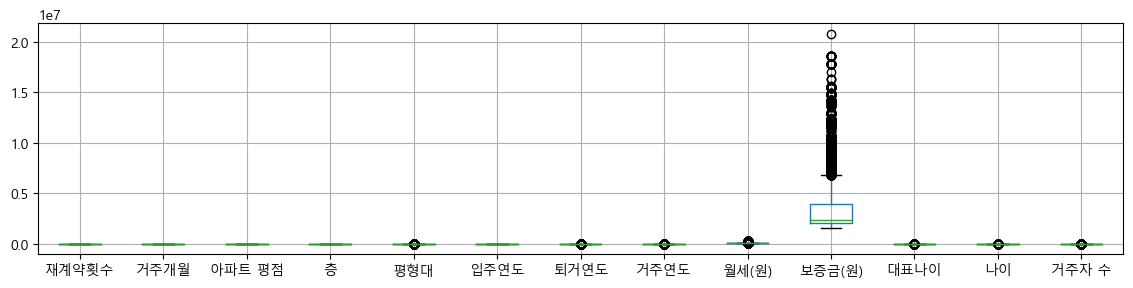

In [64]:
result_df.drop(['순번', '아파트 ID', '호실고유번호', '계약자고유번호', '계약서고유번호'], axis=1).boxplot(figsize=(14, 3));

In [5]:
# 이상치 인덱스 추출
def dect_outliers(df=None, column=None, weight=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    IQR_weight = IQR*weight
    outlier_idx = df[(df[column] < Q1 - IQR_weight) | (df[column] > Q3 + IQR_weight)].index
    return outlier_idx

# 이상치를 평균으로 대체
out_index = dect_outliers(df=result_df, column='보증금(원)')
result_df.loc[out_index, '보증금(원)'] = np.mean(result_df['보증금(원)'])

#### 2-1
- 재계약 횟수의 중앙값을 기준으로 중앙값보다 크거나 같으면 ‘높음’, 작으면 ‘낮음’ 으로 재계약 횟수 이분 변수를 구성하시오.

In [75]:
def binary(x):
    if x >= np.median(result_df['재계약횟수']):
        return '높음'
    else:
        return '낮음'

result_df['binary_count'] = result_df['재계약횟수'].apply(binary)

#### 2-2
- 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.
    - 앞선 EDA에서 독립변수 간 상관성을 확인한 결과, 다중공선성을 의심할만한 관계가 존재하였다. 따라서 차원 축소를 통해 다중공선성 문제를 해결할 필요가 있을 것이다.

In [76]:
# 필요없는 칼럼 삭제
df1 = result_df.drop(['순번', '아파트 ID', '호실고유번호', '계약자고유번호', '계약서고유번호'], axis=1)

# 독립변수 추출 및 원-핫 인코딩
X = df1.drop('binary_count', axis=1)
X_dum = pd.get_dummies(data=X, columns=['계약구분', '아파트 이름', '입주연도', '퇴거연도', 
                                          '거주연도', '성별', '결혼여부', '퇴거여부'], drop_first=True)
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = X_dum.copy()
X_scaled.iloc[:, :10] = scaler.fit_transform(X_dum.iloc[:, :10])

# 주성분 분석
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca_fit = pca.fit(X_scaled)
print('분산설명력: ', pca.explained_variance_ratio_)
print('주성분 개수가 8개일 때의 누적기여율: ', pca.explained_variance_ratio_[:8].sum())

분산설명력:  [0.21003841 0.16335423 0.10629739 0.09702944 0.07330786 0.06521231
 0.05833457 0.03907416 0.02883882 0.020537   0.01843263 0.01058899
 0.00745766 0.00539155 0.00527373 0.00509118 0.00498235 0.00477452]
주성분 개수가 8개일 때의 누적기여율:  0.8126483615206963


주성분 개수가 8개일 때의 누적기여율이 약 0.81이므로 적절한 주성분의 개수를 8개로 설정할 수 있다.

#### 3-1
- 재계약 횟수 이분변수를 기준으로 세그먼트를 구분하고 각 세그먼트의 특징을 분석하시오.

In [77]:
lower_df = result_df.loc[result_df['binary_count']=='낮음', ]
higher_df = result_df.loc[result_df['binary_count']=='높음', ]

In [78]:
display(lower_df[['binary_count', '거주개월', '재계약횟수', '아파트 평점', '월세(원)', '보증금(원)', '나이']].\
groupby('binary_count').mean())

display(lower_df.groupby(['binary_count','계약구분', '아파트 이름', '층', '입주연도', '퇴거연도', '거주연도', 
                  '성별', '결혼여부', '퇴거여부'])['binary_count'].count().idxmax())

,거주개월,재계약횟수,아파트 평점,월세(원),보증금(원),나이
binary_count,,,,,,
낮음,68.048387,2.893145,6.279435,49489.955645,2.619673e+06,59.027621


('낮음', '유효', '비둘기아파트', 5, 2014, 2017.0, 2020, '남', '미혼', '미퇴거')

In [79]:
display(higher_df[['binary_count', '거주개월', '재계약횟수', '아파트 평점', '월세(원)', '보증금(원)', '나이']].\
groupby('binary_count').mean())

display(higher_df.groupby(['binary_count','계약구분', '아파트 이름', '층', '입주연도', '퇴거연도', '거주연도', 
                  '성별', '결혼여부', '퇴거여부'])['binary_count'].count().idxmax())

,거주개월,재계약횟수,아파트 평점,월세(원),보증금(원),나이
binary_count,,,,,,
높음,201.982925,8.618411,6.410913,77243.585746,3.112192e+06,65.940609


('높음', '유효', '비둘기아파트', 14, 2002, 2017.0, 2020, '여', '미혼', '미퇴거')

#### 3-2 
- 재계약횟수 변수를 종속변수로 하는 회귀 분석을 두 가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오. 재계약횟수 이분변수를 종속변수로 하는 분류 분석을 두가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오.

In [107]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

# 필요없는 칼럼 삭제
df1 = result_df.drop(['순번', '아파트 ID', '호실고유번호', '계약자고유번호', '계약서고유번호'], axis=1)
# df1.head(2)
df1_dum = pd.get_dummies(df1, drop_first=True)
df1_dum.head(2)

,재계약횟수,거주개월,아파트 평점,층,평형대,입주연도,퇴거연도,거주연도,월세(원),보증금(원),...,거주자 수,계약구분_해지,아파트 이름_까치아파트,아파트 이름_비둘기아파트,아파트 이름_용지아파트,아파트 이름_지산5단지아파트,성별_여,결혼여부_미혼,퇴거여부_퇴거,binary_count_높음
85372,4,88,8.0,6,12,2005,2012.0,2012,77300,5302000.0,...,2,1,0,0,0,1,0,0,1,0
85427,7,174,8.0,6,15,2001,2016.0,2016,48600,2144000.0,...,1,1,0,0,0,1,0,1,1,1


In [105]:
# 회귀 분석

# 데이터 분할
X = df1_dum.drop(['재계약횟수', 'binary_count_높음'], axis=1)
y = df1_dum['재계약횟수']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)

# 모델 객체 생성
rfr_reg = RandomForestRegressor(random_state=321)
lgbm_reg = LGBMRegressor(random_state=321)

def make_model_reg(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(pred, y_test)
    rmse = round(np.sqrt(mse),4)
    print(f'### {model.__class__.__name__} ###')
    print('RMSE: ', rmse)
make_model_reg(rfr_reg)
make_model_reg(lgbm_reg)

### RandomForestRegressor ###
RMSE:  0.6324
### LGBMRegressor ###
RMSE:  0.5518


In [108]:
# 분류 분석

# 데이터 분할
X = df1_dum.drop(['재계약횟수', 'binary_count_높음'], axis=1)
y = df1_dum['binary_count_높음']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321, stratify=y)

# 모델 객체 생성
rfr_clf = RandomForestClassifier(random_state=321)
lgbm_clf = LGBMClassifier(random_state=321)

def make_model_clf(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = round(accuracy_score(pred, y_test),4)
    print(f'### {model.__class__.__name__} ###')
    print('accuracy: ', acc)
make_model_clf(rfr_clf)
make_model_clf(lgbm_clf)

### RandomForestClassifier ###
accuracy:  0.9807
### LGBMClassifier ###
accuracy:  0.9842


#### 3-3
- 최종 채택한 모델에서 각각 유의하게 작용하는 변수를 확인 하고 설명하시오